<a href="https://colab.research.google.com/github/tesyaeriana/PCVK_Semester-5/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Tesya Eriana**<br>
**Absen: 28**<br>
**Kelas: TI-3A**


**PERTEMUAN 7**
**Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection**





**PRAKTIKUM FILTER**

a. Melakukan singkronisasi colabs dengan drive untuk mengakses file yang akan digunakan.

In [2]:
# Mengimpor drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


b. mengimport library yang akan digunakan.

In [4]:
#import librray
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Membuat fungsi konvolusi

In [28]:
# Membuat fungsi konvolusi
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

d. Memuat citra yang akan di proses dan mengubahnya menjadi citra keabuan.

In [30]:
#d. Memuat dan mengubah citra menjadi citra keabuan.
img_m = cv.imread('/content/drive/MyDrive/pcvk/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_m,cv.COLOR_BGR2GRAY)

e. Menentukan kernel yang akan digunakan.

In [31]:
# Image Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

f. Memanggil fungsi konvolusi dan menampilkan hasilnya.

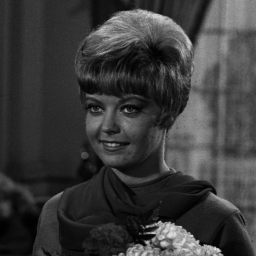

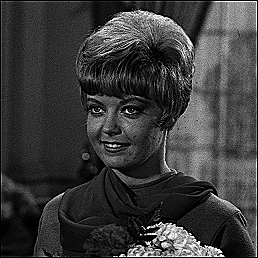

In [32]:
#f. Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan
result = convolution2d(img_gray, kernel_sharpen, stride=1, padding=2)
# Menampilkan citra asli yang telah diubah menjadi keabuan
cv2_imshow(img_gray)
# Menampilkan citra yang telah di konvolusi.
cv2_imshow(result)

Membuat Image Filter untuk Average filter, low pass filter, high pass filter dll.

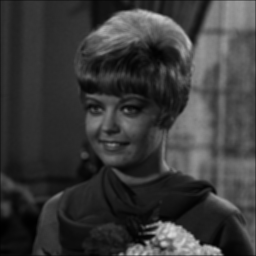

In [7]:
# Average filter
kernel_avg = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]]) / 9.0
result_avg = convolution2d(img_gray, kernel_avg, 1, 1)
cv2_imshow(result_avg)

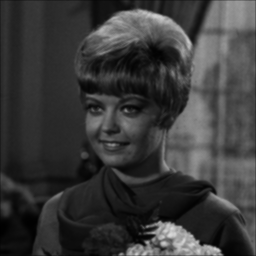

In [8]:
#Low Pass Filter
kernel_lp = np.array([[1, 1, 1],[1, 4, 1],[1, 1, 1]]) / 12.0
result_lp = convolution2d(img_gray, kernel_lp, 1, 1)
cv2_imshow(result_lp)

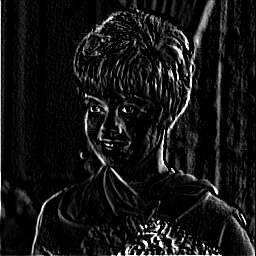

In [9]:
#High Pass Filter
kernel_hp = np.array([[-1, 0, 1], [-1, 0, 3],[-3, 0, 1]])
result_hp = convolution2d(img_gray, kernel_hp, 1, 1)
cv2_imshow(result_hp)

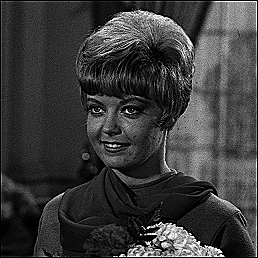

In [10]:
#Sharpen
result_sharpen = convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(result_sharpen)

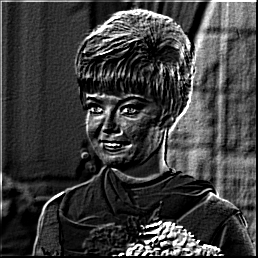

In [11]:
#Emboss
kernel_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
result_emboss = convolution2d(img_gray,kernel_emboss,1,2)
cv2_imshow(result_emboss)

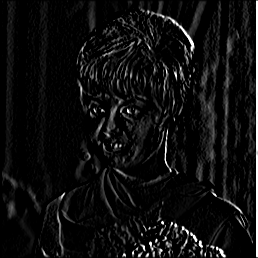

In [12]:
#Left Sobel Edge Detection
kernel_lsed = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
result_lsed = convolution2d(img_gray,kernel_lsed,1,2)
cv2_imshow(result_lsed)

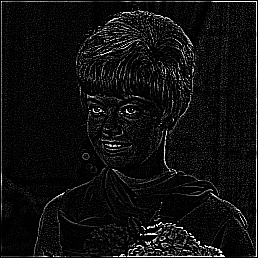

In [20]:
#Canny Edge Detection
kernel_canny = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
result_canny = convolution2d(img_gray,kernel_canny,1,2)
cv2_imshow(result_canny)

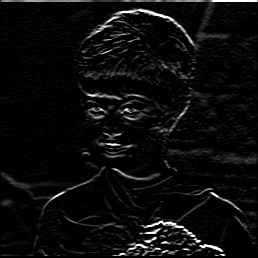

In [21]:
#Prewitt Edge Detection
kernel_prewitt = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
result_prewitt = convolution2d(img_gray,kernel_prewitt,1,2)
cv2_imshow(result_prewitt)

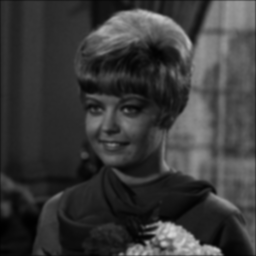

In [22]:
#5x5 Gaussian Blur
gaussian_blur_5_x_5 = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]], dtype=float)

gaussian_blur_5_x_5 /= 256

result_gaussian_blur_5_x_5 = convolution2d(img_gray,gaussian_blur_5_x_5,1,2)
cv2_imshow(result_gaussian_blur_5_x_5)

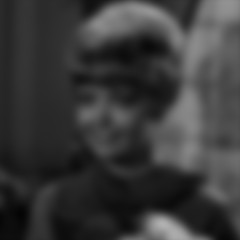

In [23]:
#21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size,sigma)
gaussian_blur_21 = gaussian_kernel @ gaussian_kernel.transpose()

result_gaussian_blur_21_x_21 = convolution2d(img_gray,gaussian_blur_21,1,2)
cv2_imshow(result_gaussian_blur_21_x_21)

**TUGAS PRAKTIKUM**

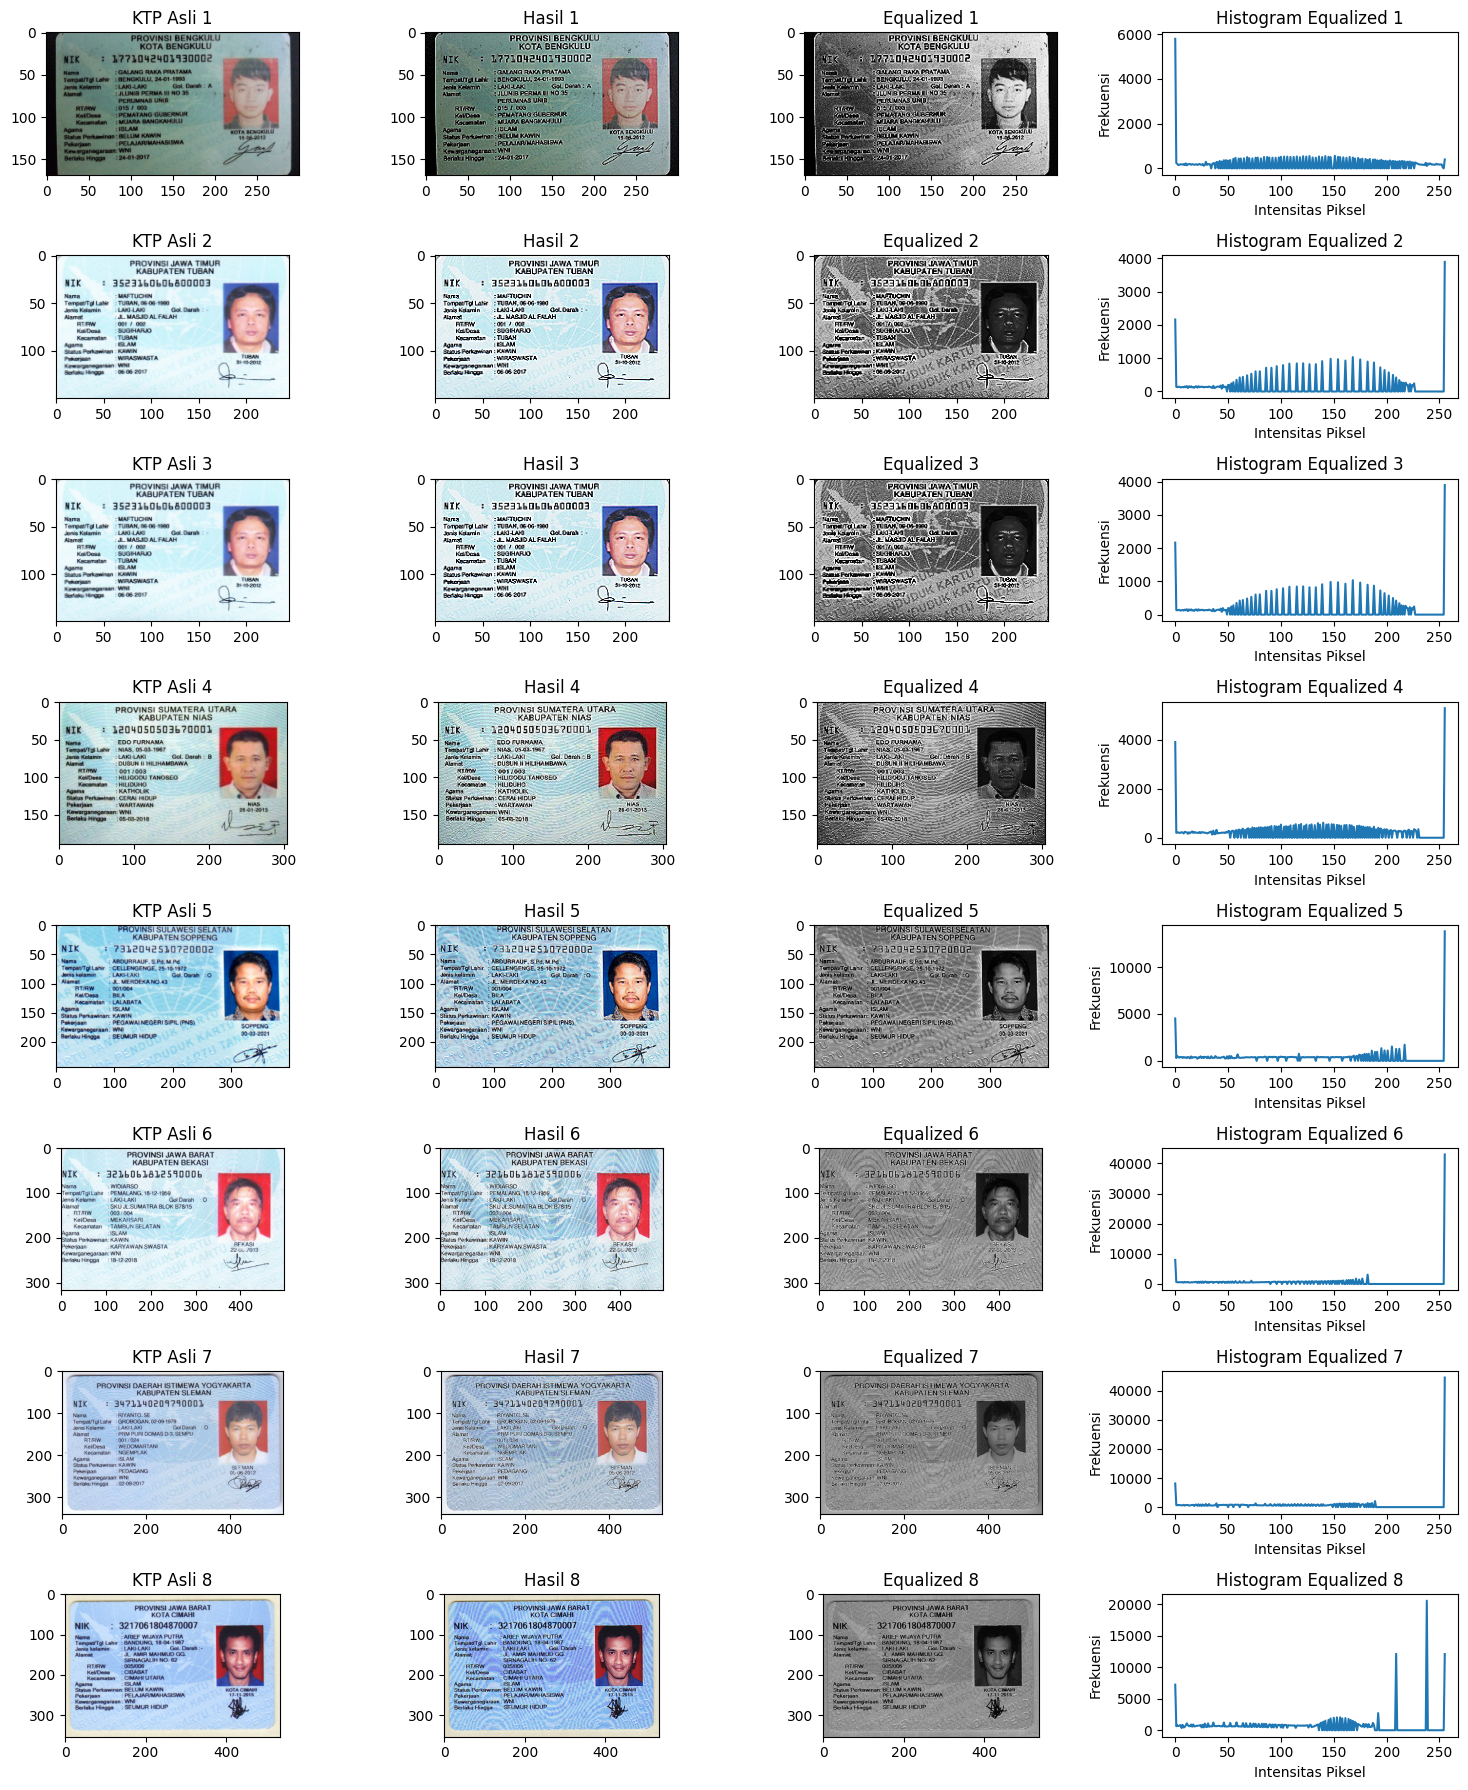

In [33]:
import os
# Membuat fungsi untuk menyesuaikan kecerahan
def adjust_brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = cv.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv.merge((h, s, v))
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
sharpen_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

# Mengatur path folder lokasi beberapa foto ktp
folder_path = '/content/drive/MyDrive/pcvk/KTP_More'

# Mendapatkan daftar file gambar dalam folder dengan ekstensi yang sesuai
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Mengatur tampilan grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Iterasi melalui gambar-gambar KTP
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv.imread(ktp_path)

    # Mengubah ukuran gambar KTP menjadi setengah ukuran aslinya
    ktp_image_resized = cv.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Terapkan penyesuaian kecerahan
    brightness_adjusted = adjust_brightness(ktp_image_resized, -10)

    # Terapkan filter pengasahan
    sharpened = cv.filter2D(brightness_adjusted, -1, sharpen_kernel)

    # Melakukan equalisasi histogram
    sharpened_gray = cv.cvtColor(sharpened, cv.COLOR_BGR2GRAY)
    equalized = cv.equalizeHist(sharpened_gray)
    equalized_color = cv.cvtColor(equalized, cv.COLOR_GRAY2BGR)

    # Menampilkan gambar asli dengan label
    axs[i, 0].imshow(cv.cvtColor(ktp_image_resized, cv.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP Asli {i+1}')

    # Menampilkan gambar yang telah diolah dengan label
    axs[i, 1].imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
    axs[i, 1].set_title(f'Hasil {i+1}')

    # Menampilkan gambar hasil equalisasi dengan label
    axs[i, 2].imshow(cv.cvtColor(equalized_color, cv.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized {i+1}')

    # Menghitung histogram dari gambar hasil equalisasi
    hist_equalized = cv.calcHist([equalized], [0], None, [256], [0, 256])

    # Menampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Menampilkan hasil keseluruhan
plt.tight_layout()
plt.show()